<a href="https://colab.research.google.com/github/tylerlum/ufc_automated_scoring_system/blob/main/UFC_automated_scoring_2022-04-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UFC Automated Scoring

The goal of this notebook is to:
* Read in stored, scraped UFC data and convert it into a dataset ready for ML models
* Train, test, and analyze ML models

Functional as of April 2021

## Read in stored data

In [1]:
import numpy as np
import pandas as pd

In [2]:
STORED_FIGHT_TABLE = pd.read_csv('FIGHT_TABLE_NUM_EVENTS_All_DATA_MODE_Summary_22-04-2021_11:08:22.csv')

In [3]:
STORED_FIGHT_TABLE

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method
0,0,0,150,62,52.0,29.0,169,70,4,1,...,22,13,138,59,5,3,7,0,0,U-DEC
1,0,0,105,88,47.0,45.0,109,99,0,0,...,25,17,103,84,2,4,0,0,0,U-DEC
2,0,0,21,27,44.0,49.0,32,91,0,8,...,1,1,14,18,5,3,2,6,1,U-DEC
3,0,1,66,55,58.0,46.0,84,72,3,0,...,7,17,39,50,7,4,20,1,0,S-DEC
4,0,0,90,80,46.0,47.0,90,82,0,4,...,4,20,88,77,2,3,0,0,0,S-DEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,2,0,24,16,68.0,33.0,49,31,0,1,...,12,0,17,7,4,4,3,5,0,KO/TKO Punch
5889,0,0,19,24,55.0,55.0,95,145,1,2,...,5,2,4,1,15,23,0,0,0,S-DEC
5890,0,0,14,13,35.0,19.0,30,15,3,0,...,3,0,11,12,0,1,3,0,0,U-DEC
5891,0,0,9,3,56.0,60.0,17,11,1,0,...,2,0,2,0,5,3,2,0,0,SUB Guillotine Choke


In [4]:
STORED_FIGHT_TABLE[(STORED_FIGHT_TABLE["Fighter 0 Total str."] == 0) & (STORED_FIGHT_TABLE["Winner"] == 0)]

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method
1727,0,0,0,0,0.0,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,SUB Armbar
2794,0,0,0,1,NaN,100.0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,SUB Rear Naked Choke
2940,0,0,0,0,NaN,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SUB Armbar
3629,0,0,0,2,0.0,40.0,0,2,0,1,...,0,0,0,2,0,0,0,0,0,SUB Heel Hook
3745,0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SUB Armbar
4119,0,0,0,4,NaN,57.0,0,7,0,0,...,0,0,0,4,0,0,0,0,0,SUB Armbar
4465,0,0,0,0,0.0,0.0,0,6,0,0,...,0,0,0,0,0,0,0,0,0,SUB Triangle Choke
4746,0,0,0,0,0.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,SUB Heel Hook
4908,0,0,0,1,0.0,20.0,0,4,0,0,...,0,0,0,1,0,0,0,0,0,SUB Guillotine Choke
4984,0,0,0,0,NaN,0.0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,SUB Heel Hook


In [5]:
STORED_FIGHT_TABLE[(STORED_FIGHT_TABLE["Fighter 1 Total str."] == 0) & (STORED_FIGHT_TABLE["Winner"] == 1)]

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method
2131,0,0,2,0,33.0,0.0,11,0,0,1,...,0,0,0,0,2,0,0,0,1,SUB Guillotine Choke
3041,0,0,4,0,44.0,0.0,5,0,1,0,...,0,0,0,0,0,0,4,0,1,SUB Heel Hook
3695,0,0,0,0,0.0,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,1,SUB Guillotine Choke
4241,0,0,8,0,80.0,NaN,12,0,0,0,...,0,0,1,0,0,0,7,0,1,DQ
4622,0,0,2,0,25.0,0.0,3,0,1,0,...,0,0,1,0,0,0,1,0,1,SUB Armbar
4755,0,0,1,0,20.0,0.0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,KO/TKO


In [6]:
# Clean dataset: Only decisions with clear winners
# STORED_FIGHT_TABLE = STORED_FIGHT_TABLE[STORED_FIGHT_TABLE["Method"].str.contains("DEC")]
# STORED_FIGHT_TABLE = STORED_FIGHT_TABLE[(STORED_FIGHT_TABLE["Winner"] == 1) | (STORED_FIGHT_TABLE["Winner"] == 0)]
STORED_FIGHT_TABLE

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method
0,0,0,150,62,52.0,29.0,169,70,4,1,...,22,13,138,59,5,3,7,0,0,U-DEC
1,0,0,105,88,47.0,45.0,109,99,0,0,...,25,17,103,84,2,4,0,0,0,U-DEC
2,0,0,21,27,44.0,49.0,32,91,0,8,...,1,1,14,18,5,3,2,6,1,U-DEC
3,0,1,66,55,58.0,46.0,84,72,3,0,...,7,17,39,50,7,4,20,1,0,S-DEC
4,0,0,90,80,46.0,47.0,90,82,0,4,...,4,20,88,77,2,3,0,0,0,S-DEC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,2,0,24,16,68.0,33.0,49,31,0,1,...,12,0,17,7,4,4,3,5,0,KO/TKO Punch
5889,0,0,19,24,55.0,55.0,95,145,1,2,...,5,2,4,1,15,23,0,0,0,S-DEC
5890,0,0,14,13,35.0,19.0,30,15,3,0,...,3,0,11,12,0,1,3,0,0,U-DEC
5891,0,0,9,3,56.0,60.0,17,11,1,0,...,2,0,2,0,5,3,2,0,0,SUB Guillotine Choke


In [7]:
fighter0 = "Gleison Tibau"
fighter1 = "Josh Neer"

In [8]:
controversial = STORED_FIGHT_TABLE[(STORED_FIGHT_TABLE["Fighter 0 Name"] == fighter0)]
without_controversial = STORED_FIGHT_TABLE.drop(index=controversial.index)

In [9]:
controversial = STORED_FIGHT_TABLE[(STORED_FIGHT_TABLE["Fighter 0 Name"] == fighter0) & (STORED_FIGHT_TABLE["Fighter 1 Name"] == fighter1)]
without_controversial = STORED_FIGHT_TABLE.drop(index=controversial.index)

In [10]:
without_controversial[(without_controversial["Fighter 0 Name"] == fighter0) & (without_controversial["Fighter 1 Name"] == fighter1)]

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method


In [11]:
controversial

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground,Winner,Method
4845,0,0,22,24,18.0,24.0,35,47,11,0,...,0,7,19,22,2,1,1,1,0,U-DEC


In [12]:
X_train = without_controversial.drop(['Winner', 'Fighter 0 Name', 'Fighter 1 Name', 'Method'], axis=1).fillna(0)
y_train = without_controversial[['Winner']]

In [13]:
X_valid = controversial.drop(['Winner', 'Fighter 0 Name', 'Fighter 1 Name', 'Method'], axis=1).fillna(0)
y_valid = controversial[['Winner']]

In [14]:
X_train.head()

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Body,Fighter 1 Body,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground
0,0,0,150,62,52.0,29.0,169,70,4,1,...,13,7,22,13,138,59,5,3,7,0
1,0,0,105,88,47.0,45.0,109,99,0,0,...,26,16,25,17,103,84,2,4,0,0
2,0,0,21,27,44.0,49.0,32,91,0,8,...,9,2,1,1,14,18,5,3,2,6
3,0,1,66,55,58.0,46.0,84,72,3,0,...,19,8,7,17,39,50,7,4,20,1
4,0,0,90,80,46.0,47.0,90,82,0,4,...,12,20,4,20,88,77,2,3,0,0


In [15]:
y_train.head()

,Winner
0,0
1,0
2,1
3,0
4,0


In [16]:
X_valid.head()

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Body,Fighter 1 Body,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground
4845,0,0,22,24,18.0,24.0,35,47,11,0,...,1,5,0,7,19,22,2,1,1,1


In [17]:
y_valid.head()

,Winner
4845,0


## Setup train/validate/test split with data augmentation

TODO: Add in smarter data augmentation that create new datapoints nearby.

In [18]:
def create_flipped_table(table):
    '''Rearranges columns of table so that each fight has two rows. Let fighters be A and B.
       One row has (Fighter 0 = A, Fighter 1 = B). One row has (Fighter 0 = B, Fighter 1 = A)
       Ensure same column order, as column names not looked at when passed to ML model'''

    # Get columns in flipped order, which moves the columns around, but changes column name order too
    flipped_columns = []
    for column in table.columns:
        if "Fighter 0" in column:
            flipped_columns.append(column.replace("Fighter 0", "Fighter 1"))
        elif "Fighter 1" in column:
            flipped_columns.append(column.replace("Fighter 1", "Fighter 0"))
        else:
            flipped_columns.append(column)
    flipped_table = table[flipped_columns]

    # Flips winners around
    if 'Winner' in flipped_table.columns:
         flipped_table['Winner'] = flipped_table['Winner'].replace([0, 1], [1, 0])

    # Change column names back to normal
    flipped_table.columns = table.columns
    return flipped_table


def add_rows_of_flipped_columns(table):
    flipped_table = create_flipped_table(table)
    new_table = pd.concat([table, flipped_table])
    return new_table

In [19]:
# Add flipped rows so fighter 0 and 1 are treated same
X_train, y_train = add_rows_of_flipped_columns(X_train), add_rows_of_flipped_columns(y_train)
X_valid, y_valid = add_rows_of_flipped_columns(X_valid), add_rows_of_flipped_columns(y_valid)

In [20]:
# Expect equal number of examples in Fighter 0 as Fighter 1 from data augmentation
assert(len(y_train[y_train['Winner'] == 0]) == len(y_train[y_train['Winner'] == 1]))
assert(len(y_valid[y_valid['Winner'] == 0]) == len(y_valid[y_valid['Winner'] == 1]))


In [21]:
X_train

,Fighter 0 KD,Fighter 1 KD,Fighter 0 Sig. str.,Fighter 1 Sig. str.,Fighter 0 Sig. str. %,Fighter 1 Sig. str. %,Fighter 0 Total str.,Fighter 1 Total str.,Fighter 0 Td,Fighter 1 Td,...,Fighter 0 Body,Fighter 1 Body,Fighter 0 Leg,Fighter 1 Leg,Fighter 0 Distance,Fighter 1 Distance,Fighter 0 Clinch,Fighter 1 Clinch,Fighter 0 Ground,Fighter 1 Ground
0,0,0,150,62,52.0,29.0,169,70,4,1,...,13,7,22,13,138,59,5,3,7,0
1,0,0,105,88,47.0,45.0,109,99,0,0,...,26,16,25,17,103,84,2,4,0,0
2,0,0,21,27,44.0,49.0,32,91,0,8,...,9,2,1,1,14,18,5,3,2,6
3,0,1,66,55,58.0,46.0,84,72,3,0,...,19,8,7,17,39,50,7,4,20,1
4,0,0,90,80,46.0,47.0,90,82,0,4,...,12,20,4,20,88,77,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5888,0,2,16,24,33.0,68.0,31,49,1,0,...,0,0,0,12,7,17,4,4,5,3
5889,0,0,24,19,55.0,55.0,145,95,2,1,...,20,12,2,5,1,4,23,15,0,0
5890,0,0,13,14,19.0,35.0,15,30,0,3,...,7,4,0,3,12,11,1,0,0,3
5891,0,0,3,9,60.0,56.0,11,17,0,1,...,3,1,0,2,0,2,3,5,0,2


In [22]:
y_train

,Winner
0,0
1,0
2,1
3,0
4,0
...,...
5888,1
5889,1
5890,1
5891,1


In [23]:
print(f"X_train.shape = {X_train.shape}")
print(f"X_valid.shape = {X_valid.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"y_valid.shape = {y_valid.shape}")


X_train.shape = (11784, 30)
X_valid.shape = (2, 30)
y_train.shape = (11784, 1)
y_valid.shape = (2, 1)


### Standardize features and break into fighter 0 and 1

In [24]:
fighter0_columns = [col for col in X_train.columns if "Fighter 0" in col]
fighter1_columns = [col for col in X_train.columns if "Fighter 1" in col]

X0_train = X_train[fighter0_columns]
X1_train = X_train[fighter1_columns]
X0_valid = X_valid[fighter0_columns]
X1_valid = X_valid[fighter1_columns]

X_train_new = pd.concat([X0_train, X1_train], axis=1)
X_valid_new = pd.concat([X0_valid, X1_valid], axis=1) 

means, stds = X_train_new.mean(), X_train_new.std()
X_train_new_normal = (X_train_new - means) / stds
X_valid_new_normal = (X_valid_new - means) / stds

## Define inputs to future training

In [25]:
# X_train, y_train = X_train_new_normal_aug, y_train_aug
X_train = X_train_new_normal
X_valid = X_valid_new_normal

## Train and test ML models

TODO: Play around with PyTorch, add in data augmentation like SMOTE, see if normalizing, standardizing, extracting difference features helps. Must be done for deep models. Try out PCA or MDS to visualize.

In [26]:
import matplotlib.pyplot as plt


In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def get_predIdxs_and_trueIdxs(classifier, X, y):
    predIdxs = np.where(classifier.predict(X) > 0.5, 1, 0)
    trueIdxs = y
    return predIdxs, trueIdxs

def plot_confusion_matrix(classifier, X, y):
    predIdxs, trueIdxs = get_predIdxs_and_trueIdxs(classifier, X, y)
    cm = confusion_matrix(trueIdxs, predIdxs)
    cmDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fighter 0 Win", "Fighter 1 Win"])
    cmDisplay.plot()
    
def print_classification_report(classifier, X, y):
    predIdxs, trueIdxs = get_predIdxs_and_trueIdxs(classifier, X, y)
    print(classification_report(trueIdxs, predIdxs, target_names=["Fighter 0 Win", "Fighter 1 Win"]))

### Decision Tree

accuracy_train = 1.0
accuracy_valid = 1.0


<BarContainer object of 30 artists>

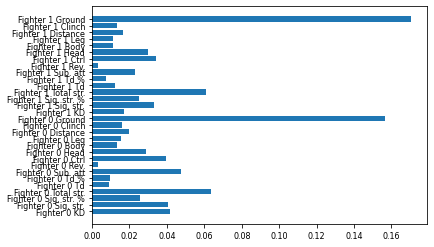

In [28]:
from sklearn.tree import DecisionTreeClassifier
# Train
decision_tree_clf = DecisionTreeClassifier(random_state=0)
decision_tree_clf.fit(X_train, y_train)

# Validate
accuracy_train = decision_tree_clf.score(X_train, y_train)
accuracy_valid = decision_tree_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

# Visualize importances
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
plt.barh(X_train.columns, decision_tree_clf.feature_importances_)

               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



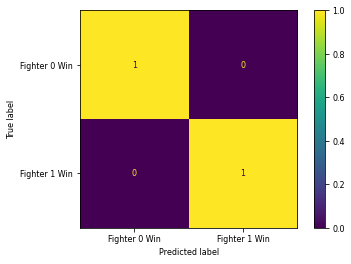

In [29]:
plot_confusion_matrix(decision_tree_clf, X_valid, y_valid)
print_classification_report(decision_tree_clf, X_valid, y_valid)

### Random forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


accuracy_train = 0.8593007467752886
accuracy_valid = 1.0


<BarContainer object of 30 artists>

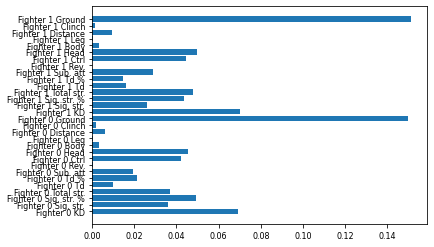

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train
random_forest_clf = RandomForestClassifier(max_depth=5, random_state=0)
random_forest_clf.fit(X_train, y_train)

# Validate
accuracy_train = random_forest_clf.score(X_train, y_train)
accuracy_valid = random_forest_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

# Visualize importances
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
plt.barh(X_train.columns, random_forest_clf.feature_importances_)

               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



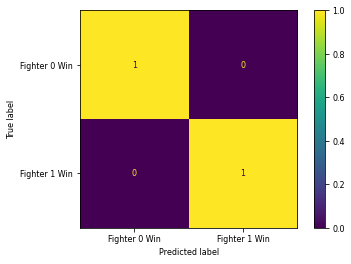

In [31]:
plot_confusion_matrix(random_forest_clf, X_valid, y_valid)
print_classification_report(random_forest_clf, X_valid, y_valid)

### Extra trees

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


accuracy_train = 1.0
accuracy_valid = 1.0


<BarContainer object of 30 artists>

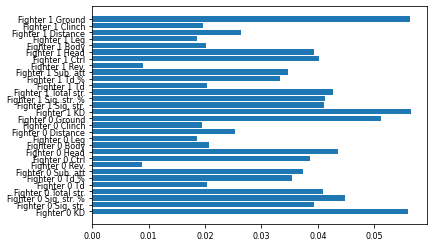

In [32]:
from sklearn.ensemble import ExtraTreesClassifier

# Train
extra_trees_clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
extra_trees_clf.fit(X_train, y_train)

# Validate
accuracy_train = extra_trees_clf.score(X_train, y_train)
accuracy_valid = extra_trees_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

# Visualize importances
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
plt.barh(X_train.columns, extra_trees_clf.feature_importances_)

               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



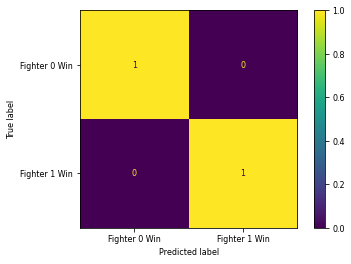

In [33]:
plot_confusion_matrix(extra_trees_clf, X_valid, y_valid)
print_classification_report(extra_trees_clf, X_valid, y_valid)

### MLP

In [34]:
# MLP
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
accuracy_train = mlp_clf.score(X_train, y_train)
accuracy_valid = mlp_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_train = 0.9335539714867617
accuracy_valid = 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



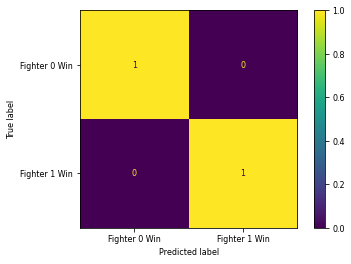

In [35]:
plot_confusion_matrix(mlp_clf, X_valid, y_valid)
print_classification_report(mlp_clf, X_valid, y_valid)

### SVM

In [36]:
# SVM
from sklearn.svm import SVC

svm_clf = SVC(random_state=1, probability=True).fit(X_train, y_train)
accuracy_train = svm_clf.score(X_train, y_train)
accuracy_valid = svm_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_train = 0.8908689748811949
accuracy_valid = 1.0


               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



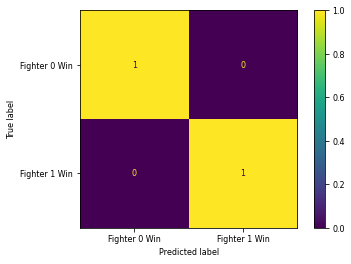

In [37]:
plot_confusion_matrix(svm_clf, X_valid, y_valid)
print_classification_report(svm_clf, X_valid, y_valid)

In [38]:
# SVM linear kernel
svm_linear_clf = SVC(kernel='linear', random_state=1, probability=True).fit(X_train, y_train)
accuracy_train = svm_linear_clf.score(X_train, y_train)
accuracy_valid = svm_linear_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_train = 0.8671079429735234
accuracy_valid = 1.0


<BarContainer object of 30 artists>

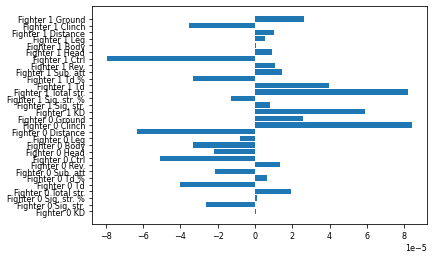

In [39]:
# Visualize importances
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
plt.barh(X_train.columns, svm_linear_clf.coef_[0])

               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



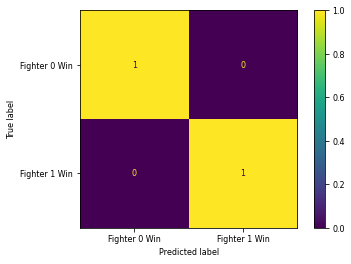

In [40]:
plot_confusion_matrix(svm_linear_clf, X_valid, y_valid)
print_classification_report(svm_linear_clf, X_valid, y_valid)

In [41]:
probability0 = svm_linear_clf.predict_proba(X_valid)[0][0]
probability1 = svm_linear_clf.predict_proba(X_valid)[0][1]
print(f"Probability that {fighter0} won: {probability0}")
print(f"Probability that {fighter1} won: {probability1}")
print(f"Actual winner: {fighter0 if y_valid.iloc[0][0] == 0 else fighter1}")

Probability that Gleison Tibau won: 0.005950826667561731
Probability that Josh Neer won: 0.9806024512692794
Actual winner: Gleison Tibau


### XGBoost

In [42]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

accuracy_train = xgb_clf.score(X_train, y_train)
accuracy_valid = xgb_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_train = 0.8772912423625254
accuracy_valid = 1.0


               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



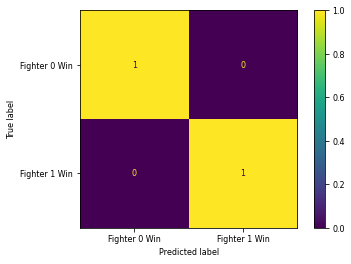

In [43]:
plot_confusion_matrix(xgb_clf, X_valid, y_valid)
print_classification_report(xgb_clf, X_valid, y_valid)

### Logistic regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_train = 0.8628649015614392
accuracy_valid = 1.0


<BarContainer object of 30 artists>

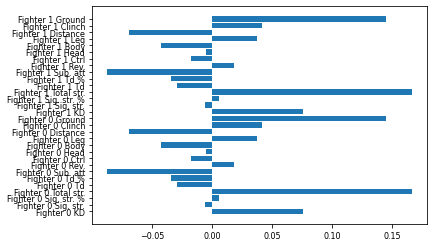

In [44]:
from sklearn.linear_model import LogisticRegression
logistic_regression_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

accuracy_train = logistic_regression_clf.score(X_train, y_train)
accuracy_valid = logistic_regression_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

# Visualize importances
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
plt.barh(X_train.columns, logistic_regression_clf.coef_[0])

               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



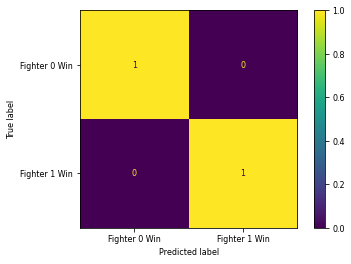

In [45]:
plot_confusion_matrix(logistic_regression_clf, X_valid, y_valid)
print_classification_report(logistic_regression_clf, X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_train = 0.8638832315003394
accuracy_valid = 1.0


<BarContainer object of 30 artists>

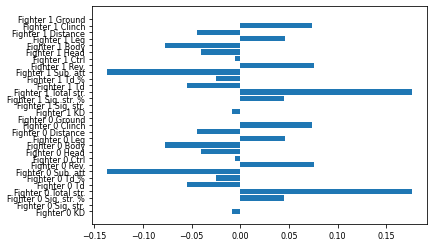

In [46]:
logistic_regression_l1_clf = LogisticRegression(penalty='l1', solver='liblinear', random_state=0).fit(X_train, y_train)

accuracy_train = logistic_regression_l1_clf.score(X_train, y_train)
accuracy_valid = logistic_regression_l1_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

# Visualize importances
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 8})
plt.barh(X_train.columns, logistic_regression_l1_clf.coef_[0])

               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



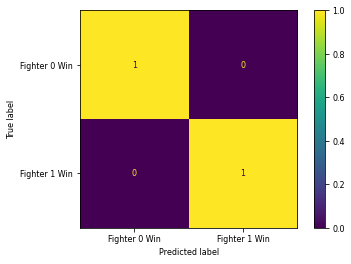

In [47]:
plot_confusion_matrix(logistic_regression_l1_clf, X_valid, y_valid)
print_classification_report(logistic_regression_l1_clf, X_valid, y_valid)

### KNN classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

accuracy_train = knn_clf.score(X_train, y_train)
accuracy_valid = knn_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


accuracy_train = 0.8668533604887984
accuracy_valid = 1.0


               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



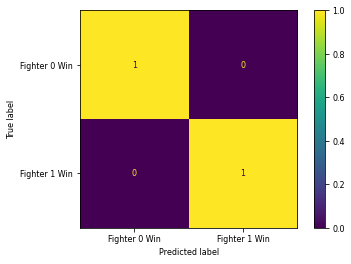

In [49]:
plot_confusion_matrix(knn_clf, X_valid, y_valid)
print_classification_report(knn_clf, X_valid, y_valid)

### Gradient boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)

accuracy_train = gradient_boosting_clf.score(X_train, y_train)
accuracy_valid = gradient_boosting_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_train = 0.8727087576374746
accuracy_valid = 1.0


               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



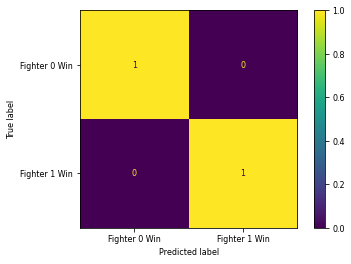

In [51]:
plot_confusion_matrix(gradient_boosting_clf, X_valid, y_valid)
print_classification_report(gradient_boosting_clf, X_valid, y_valid)

### Adaboost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
adaboost_clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

accuracy_train = adaboost_clf.score(X_train, y_train)
accuracy_valid = adaboost_clf.score(X_valid, y_valid)
print(f"accuracy_train = {accuracy_train}")
print(f"accuracy_valid = {accuracy_valid}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy_train = 0.8558214528173795
accuracy_valid = 1.0


               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



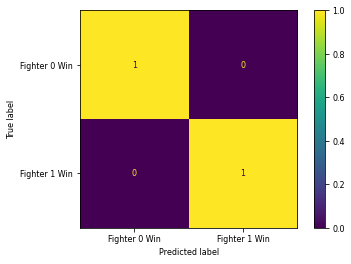

In [53]:
plot_confusion_matrix(adaboost_clf, X_valid, y_valid)
print_classification_report(adaboost_clf, X_valid, y_valid)

### Comparison Model

In [56]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Subtract, Activation
from tensorflow.keras.models import Model
def create_comparison_model(input_shape):
    num_features_per_fighter = input_shape[0] // 2

    model_ = tf.keras.models.Sequential(name="scoring_deep_model")
    model_.add(tf.keras.Input(shape=num_features_per_fighter))
    model_.add(tf.keras.layers.Dense(32, activation='relu'))
    model_.add(tf.keras.layers.Dropout(0.5))
    model_.add(tf.keras.layers.Dense(16, activation='relu'))
    model_.add(tf.keras.layers.Dropout(0.5))

    model_.add(tf.keras.layers.Dense(1, activation='relu'))
    
    # Run cnn model on each frame
    input_tensor = Input(shape=input_shape, name="input")
    fighter0_state = Lambda(lambda x: x[:, :num_features_per_fighter], name='fighter0_state')(input_tensor)
    fighter1_state = Lambda(lambda x: x[:, num_features_per_fighter:], name='fighter1_state')(input_tensor)

    fighter0_score = model_(fighter0_state)
    fighter1_score = model_(fighter1_state)
    fighter0_score = Lambda(lambda x: x, name='fighter0_score')(fighter0_score)
    fighter1_score = Lambda(lambda x: x, name='fighter1_score')(fighter1_score)
    
    difference_score = Subtract(name='subtracter')([fighter1_score, fighter0_score])
    prediction = Activation('sigmoid', name='sigmoid')(difference_score)
    return Model(inputs=input_tensor, outputs=prediction)

In [57]:
comparison_model = create_comparison_model(X_train.shape[1:])
optimizer = tf.keras.optimizers.Adam(lr=0.001)
comparison_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
comparison_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 30)]         0           []                               
                                                                                                  
 fighter1_state (Lambda)        (None, 15)           0           ['input[0][0]']                  
                                                                                                  
 fighter0_state (Lambda)        (None, 15)           0           ['input[0][0]']                  
                                                                                                  
 scoring_deep_model (Sequential  (None, 1)           1057        ['fighter0_state[0][0]',         
 )                                                                'fighter1_state[0][0]']     

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


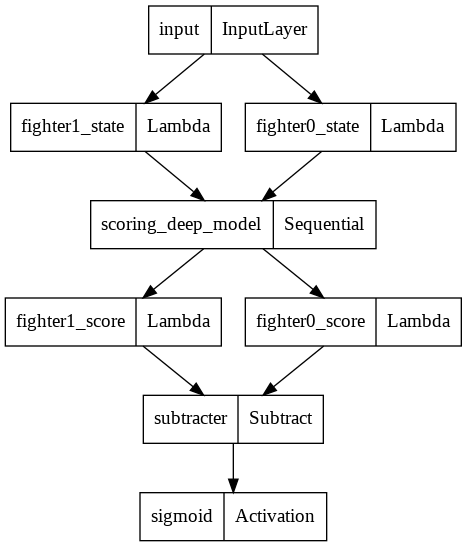

In [58]:
tf.keras.utils.plot_model(comparison_model)

In [59]:
H = comparison_model.fit(X_train, y_train, epochs=60, validation_data=(X_valid_new_normal, y_valid))

Epoch 1/60
369/369 [==============================] - 6s 5ms/step - loss: 0.5825 - accuracy: 0.6899 - val_loss: 0.1163 - val_accuracy: 1.0000
Epoch 2/60
369/369 [==============================] - 2s 4ms/step - loss: 0.4846 - accuracy: 0.7834 - val_loss: 0.1013 - val_accuracy: 1.0000
Epoch 3/60
369/369 [==============================] - 2s 4ms/step - loss: 0.4495 - accuracy: 0.8044 - val_loss: 0.0889 - val_accuracy: 1.0000
Epoch 4/60
369/369 [==============================] - 2s 4ms/step - loss: 0.4275 - accuracy: 0.8103 - val_loss: 0.0902 - val_accuracy: 1.0000
Epoch 5/60
369/369 [==============================] - 2s 4ms/step - loss: 0.4026 - accuracy: 0.8184 - val_loss: 0.0843 - val_accuracy: 1.0000
Epoch 6/60
369/369 [==============================] - 2s 4ms/step - loss: 0.3908 - accuracy: 0.8290 - val_loss: 0.0694 - val_accuracy: 1.0000
Epoch 7/60
369/369 [==============================] - 2s 4ms/step - loss: 0.3714 - accuracy: 0.8312 - val_loss: 0.0587 - val_accuracy: 1.0000
Epoch 

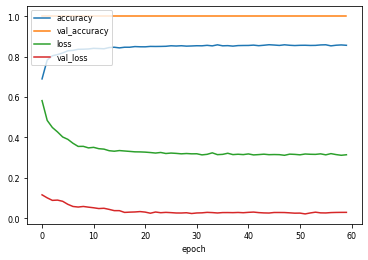

In [60]:
from matplotlib import pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'], loc='upper left')
plt.show()

               precision    recall  f1-score   support

Fighter 0 Win       1.00      1.00      1.00         1
Fighter 1 Win       1.00      1.00      1.00         1

     accuracy                           1.00         2
    macro avg       1.00      1.00      1.00         2
 weighted avg       1.00      1.00      1.00         2



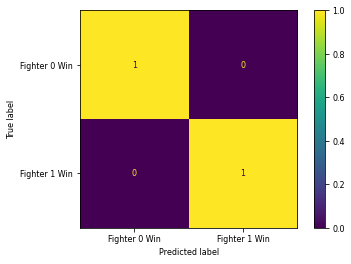

In [61]:
plot_confusion_matrix(comparison_model, X_valid_new_normal, y_valid)
print_classification_report(comparison_model, X_valid_new_normal, y_valid)

In [62]:
lo, hi = 0, 1

In [63]:
X_test_new_normal = X_valid_new_normal

In [ ]:
y_test = y_valid

In [ ]:
X_test_new_normal[lo:hi]

In [ ]:
probability = comparison_model.predict(X_test_new_normal[lo:hi])[0]

In [ ]:
comparison_model.predict(X_test_new_normal[lo:hi])

In [ ]:
y_test[lo:hi]

In [ ]:
subtracter = comparison_model.get_layer('subtracter').output
subtracter = Model(comparison_model.input, subtracter)
subtracter.predict(X_test_new_normal[lo:hi])

In [ ]:
fighter0_score = comparison_model.get_layer('fighter0_score').output
fighter0_score = Model(comparison_model.input, fighter0_score)
fighter0_score.predict(X_test_new_normal[lo:hi])

In [ ]:
fighter1_score = comparison_model.get_layer('fighter1_score').output
fighter1_score = Model(comparison_model.input, fighter1_score)
fighter1_score.predict(X_test_new_normal[lo:hi])

In [ ]:
score0 = fighter0_score.predict(X_test_new_normal[lo:hi])[0][0]
score1 = fighter1_score.predict(X_test_new_normal[lo:hi])[0][0]
prediction = comparison_model.predict(X_test_new_normal[lo:hi])[0][0]
print(f"{fighter0} score: {score0}")
print(f"{fighter1} score: {score1}")
print(f"Probability that {fighter1} won: {prediction}")
print(f"Actual winner: {fighter0 if y_test.iloc[0][0] == 0 else fighter1}")

In [ ]:
controversial

In [ ]:
X_test_new_normal

In [ ]:
# 
columns = list(X_test_new_normal.columns)
new_columns = columns[len(columns)//2:] + columns[:len(columns)//2]
switcheroo = X_test_new_normal[new_columns]
fighter1_score.predict(switcheroo[lo:hi])

In [ ]:
fighter0_score.predict(switcheroo[lo:hi])

In [ ]:
subtracter.predict(switcheroo[lo:hi])

In [ ]:
comparison_model.predict(switcheroo[lo:hi])

In [ ]:
deep_model.predict(X_test_new_normal[1:10])

In [ ]:
deep_model.predict(switcheroo[1:10])